## Get result from gadi and manipulate by python
- vu1 2 2 
- vu2 2 2 
- tkly1 4 2 
- ltdz1 3 3 
- zdt1 10 2
- zdt1 20 2 
- zdt2 10 2 
- zdt2 20 2
- zdt3 10 2
- zdt3 20 2
- kur1 2 2 -5.05 5
- kur1 3 2 -5.05 5
- kur1 4 2 -5.05 5
- kur1 5 2 -5.05 5
- sk2 4 2 
- `Iteration`: 100 1000 10000 100000 1000000
- `Algorithm`:  nsga2 nsga3 agnomen moead rnsga2
- `Totally`: 325 records

## Column variables:
- `Problem`: problem name 
- `Alg_name`: algorithm
- `iteration`: the number of iterations
- `Objectives`: number of objective for test problems
-  `n_variable`: number of variable (variable dimensions)
-   `lower bound`: lower bound
-   `exec_time`: exec_time (s)
-   `solutions`: solution shape, solutions shape may different according algorithm setting. such as population size, iterations, selections, crossover, etc.
-   `solution path`: the location where objective solutions is.
-   `nadir point`: max objective value in obj space
-   `ideal point`: min objective value in obj space 
-   `reference point`: reference point using here to calculate hv


In [125]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
pd.set_option('display.max_rows', None)
result = pd.read_csv('Jobs_record')
#result = pd.read_csv('Jobs_record')
sorted_result = result.sort_values(['Problem', 'Alg_name','n_variables', 'Iteration']).reset_index(drop=True)

sorted_result.loc[:,'solution_path'] = sorted_result['path'].str[29:].values
print(f'total jobs : {sorted_result.shape[0]}')
sorted_result = sorted_result.drop(columns=['path'])
sorted_result.head(15)

total jobs : 313


,Problem,Alg_name,Iteration,Objectives,n_variables,lower_bound,upper_bound,exec_time,solutions,solution_path
0,KUR1,AGNOMEN,100,2,2,[-5.05 -5.05],[5. 5.],2.176171,100,KUR1/AGNOMEN_KUR1/KUR1_AGNOMEN_Iteration-100_O...
1,KUR1,AGNOMEN,1000,2,2,[-5.05 -5.05],[5. 5.],23.522826,100,KUR1/AGNOMEN_KUR1/KUR1_AGNOMEN_Iteration-1000_...
2,KUR1,AGNOMEN,10000,2,2,[-5.05 -5.05],[5. 5.],229.492615,100,KUR1/AGNOMEN_KUR1/KUR1_AGNOMEN_Iteration-10000...
3,KUR1,AGNOMEN,100000,2,2,[-5.05 -5.05],[5. 5.],2283.545071,100,KUR1/AGNOMEN_KUR1/KUR1_AGNOMEN_Iteration-10000...
4,KUR1,AGNOMEN,1000000,2,2,[-5.05 -5.05],[5. 5.],22990.381515,100,KUR1/AGNOMEN_KUR1/KUR1_AGNOMEN_Iteration-10000...
5,KUR1,AGNOMEN,100,2,3,[-5.05 -5.05 -5.05],[5. 5. 5.],1.932723,100,KUR1/AGNOMEN_KUR1/KUR1_AGNOMEN_Iteration-100_O...
6,KUR1,AGNOMEN,1000,2,3,[-5.05 -5.05 -5.05],[5. 5. 5.],20.493146,100,KUR1/AGNOMEN_KUR1/KUR1_AGNOMEN_Iteration-1000_...
7,KUR1,AGNOMEN,10000,2,3,[-5.05 -5.05 -5.05],[5. 5. 5.],203.705397,100,KUR1/AGNOMEN_KUR1/KUR1_AGNOMEN_Iteration-10000...
8,KUR1,AGNOMEN,100000,2,3,[-5.05 -5.05 -5.05],[5. 5. 5.],2231.647945,100,KUR1/AGNOMEN_KUR1/KUR1_AGNOMEN_Iteration-10000...
9,KUR1,AGNOMEN,1000000,2,3,[-5.05 -5.05 -5.05],[5. 5. 5.],19630.959338,100,KUR1/AGNOMEN_KUR1/KUR1_AGNOMEN_Iteration-10000...


# Splitting test problems 

## KUR1

In [126]:
# split dataframe using gropuby
splits = list(sorted_result.groupby("Problem"))

# view splitted dataframe
#print(splits)

# check datatype of smaller dataframe
#print(type(splits[0][1]))

print(f'total test problems {len(splits)}')
# view smaller dataframe
kur1 = splits[0][1]
kur1

total test problems 9


,Problem,Alg_name,Iteration,Objectives,n_variables,lower_bound,upper_bound,exec_time,solutions,solution_path
0,KUR1,AGNOMEN,100,2,2,[-5.05 -5.05],[5. 5.],2.176171,100,KUR1/AGNOMEN_KUR1/KUR1_AGNOMEN_Iteration-100_O...
1,KUR1,AGNOMEN,1000,2,2,[-5.05 -5.05],[5. 5.],23.522826,100,KUR1/AGNOMEN_KUR1/KUR1_AGNOMEN_Iteration-1000_...
2,KUR1,AGNOMEN,10000,2,2,[-5.05 -5.05],[5. 5.],229.492615,100,KUR1/AGNOMEN_KUR1/KUR1_AGNOMEN_Iteration-10000...
3,KUR1,AGNOMEN,100000,2,2,[-5.05 -5.05],[5. 5.],2283.545071,100,KUR1/AGNOMEN_KUR1/KUR1_AGNOMEN_Iteration-10000...
4,KUR1,AGNOMEN,1000000,2,2,[-5.05 -5.05],[5. 5.],22990.381515,100,KUR1/AGNOMEN_KUR1/KUR1_AGNOMEN_Iteration-10000...
5,KUR1,AGNOMEN,100,2,3,[-5.05 -5.05 -5.05],[5. 5. 5.],1.932723,100,KUR1/AGNOMEN_KUR1/KUR1_AGNOMEN_Iteration-100_O...
6,KUR1,AGNOMEN,1000,2,3,[-5.05 -5.05 -5.05],[5. 5. 5.],20.493146,100,KUR1/AGNOMEN_KUR1/KUR1_AGNOMEN_Iteration-1000_...
7,KUR1,AGNOMEN,10000,2,3,[-5.05 -5.05 -5.05],[5. 5. 5.],203.705397,100,KUR1/AGNOMEN_KUR1/KUR1_AGNOMEN_Iteration-10000...
8,KUR1,AGNOMEN,100000,2,3,[-5.05 -5.05 -5.05],[5. 5. 5.],2231.647945,100,KUR1/AGNOMEN_KUR1/KUR1_AGNOMEN_Iteration-10000...
9,KUR1,AGNOMEN,1000000,2,3,[-5.05 -5.05 -5.05],[5. 5. 5.],19630.959338,100,KUR1/AGNOMEN_KUR1/KUR1_AGNOMEN_Iteration-10000...


# LTDZ1

#

In [127]:
ltdz1 = splits[1][1]
ltdz1

,Problem,Alg_name,Iteration,Objectives,n_variables,lower_bound,upper_bound,exec_time,solutions,solution_path
69,LTDZ1,AGNOMEN,100,3,3,[0 0 0],[1 1 1],3.887066,100,LTDZ1/AGNOMEN_LTDZ1/LTDZ1_AGNOMEN_Iteration-10...
70,LTDZ1,AGNOMEN,1000,3,3,[0 0 0],[1 1 1],38.805707,100,LTDZ1/AGNOMEN_LTDZ1/LTDZ1_AGNOMEN_Iteration-10...
71,LTDZ1,AGNOMEN,10000,3,3,[0 0 0],[1 1 1],394.610409,100,LTDZ1/AGNOMEN_LTDZ1/LTDZ1_AGNOMEN_Iteration-10...
72,LTDZ1,AGNOMEN,100000,3,3,[0 0 0],[1 1 1],3887.793664,100,LTDZ1/AGNOMEN_LTDZ1/LTDZ1_AGNOMEN_Iteration-10...
73,LTDZ1,MOEAD,100,3,3,[0 0 0],[1 1 1],8.087659,100,LTDZ1/MOEAD_LTDZ1/LTDZ1_MOEAD_Iteration-100_Ob...
74,LTDZ1,MOEAD,1000,3,3,[0 0 0],[1 1 1],83.083789,100,LTDZ1/MOEAD_LTDZ1/LTDZ1_MOEAD_Iteration-1000_O...
75,LTDZ1,MOEAD,10000,3,3,[0 0 0],[1 1 1],857.086366,100,LTDZ1/MOEAD_LTDZ1/LTDZ1_MOEAD_Iteration-10000_...
76,LTDZ1,MOEAD,100000,3,3,[0 0 0],[1 1 1],8545.119852,100,LTDZ1/MOEAD_LTDZ1/LTDZ1_MOEAD_Iteration-100000...
77,LTDZ1,MOEAD,100000,3,3,[0 0 0],[1 1 1],8568.310682,100,LTDZ1/MOEAD_LTDZ1/LTDZ1_MOEAD_Iteration-100000...
78,LTDZ1,NSGA2,100,3,3,[0 0 0],[1 1 1],2.667626,300,LTDZ1/NSGA2_LTDZ1/LTDZ1_NSGA2_Iteration-100_Ob...


# SK2

In [128]:
sk2 = splits[2][1]
sk2

,Problem,Alg_name,Iteration,Objectives,n_variables,lower_bound,upper_bound,exec_time,solutions,solution_path
94,SK2,AGNOMEN,100,2,4,[-10. -10. -10. -10.],[10. 10. 10. 10.],1.866149,100,SK2/AGNOMEN_SK2/SK2_AGNOMEN_Iteration-100_Obj-...
95,SK2,AGNOMEN,1000,2,4,[-10. -10. -10. -10.],[10. 10. 10. 10.],20.964014,100,SK2/AGNOMEN_SK2/SK2_AGNOMEN_Iteration-1000_Obj...
96,SK2,AGNOMEN,10000,2,4,[-10. -10. -10. -10.],[10. 10. 10. 10.],253.384184,100,SK2/AGNOMEN_SK2/SK2_AGNOMEN_Iteration-10000_Ob...
97,SK2,AGNOMEN,100000,2,4,[-10. -10. -10. -10.],[10. 10. 10. 10.],2113.493664,100,SK2/AGNOMEN_SK2/SK2_AGNOMEN_Iteration-100000_O...
98,SK2,AGNOMEN,1000000,2,4,[-10. -10. -10. -10.],[10. 10. 10. 10.],21182.920693,100,SK2/AGNOMEN_SK2/SK2_AGNOMEN_Iteration-1000000_...
99,SK2,MOEAD,100,2,4,[-10. -10. -10. -10.],[10. 10. 10. 10.],7.053319,100,SK2/MOEAD_SK2/SK2_MOEAD_Iteration-100_Obj-2_Va...
100,SK2,MOEAD,1000,2,4,[-10. -10. -10. -10.],[10. 10. 10. 10.],81.054026,100,SK2/MOEAD_SK2/SK2_MOEAD_Iteration-1000_Obj-2_V...
101,SK2,MOEAD,10000,2,4,[-10. -10. -10. -10.],[10. 10. 10. 10.],748.353042,100,SK2/MOEAD_SK2/SK2_MOEAD_Iteration-10000_Obj-2_...
102,SK2,MOEAD,100000,2,4,[-10. -10. -10. -10.],[10. 10. 10. 10.],7374.744020,100,SK2/MOEAD_SK2/SK2_MOEAD_Iteration-100000_Obj-2...
103,SK2,NSGA2,100,2,4,[-10. -10. -10. -10.],[10. 10. 10. 10.],1.849775,300,SK2/NSGA2_SK2/SK2_NSGA2_Iteration-100_Obj-2_Va...


# TKLY1

In [129]:
tkly1 = splits[3][1]
tkly1

,Problem,Alg_name,Iteration,Objectives,n_variables,lower_bound,upper_bound,exec_time,solutions,solution_path
117,TKLY1,AGNOMEN,100,2,4,[0.1 0. 0. 0. ],[1 1 1 1],2.275373,100,TKLY1/AGNOMEN_TKLY1/TKLY1_AGNOMEN_Iteration-10...
118,TKLY1,AGNOMEN,1000,2,4,[0.1 0. 0. 0. ],[1 1 1 1],25.667208,100,TKLY1/AGNOMEN_TKLY1/TKLY1_AGNOMEN_Iteration-10...
119,TKLY1,AGNOMEN,10000,2,4,[0.1 0. 0. 0. ],[1 1 1 1],256.785134,100,TKLY1/AGNOMEN_TKLY1/TKLY1_AGNOMEN_Iteration-10...
120,TKLY1,AGNOMEN,100000,2,4,[0.1 0. 0. 0. ],[1 1 1 1],2585.511240,100,TKLY1/AGNOMEN_TKLY1/TKLY1_AGNOMEN_Iteration-10...
121,TKLY1,AGNOMEN,1000000,2,4,[0.1 0. 0. 0. ],[1 1 1 1],25172.901927,100,TKLY1/AGNOMEN_TKLY1/TKLY1_AGNOMEN_Iteration-10...
122,TKLY1,MOEAD,100,2,4,[0.1 0. 0. 0. ],[1 1 1 1],7.160897,100,TKLY1/MOEAD_TKLY1/TKLY1_MOEAD_Iteration-100_Ob...
123,TKLY1,MOEAD,1000,2,4,[0.1 0. 0. 0. ],[1 1 1 1],87.142336,100,TKLY1/MOEAD_TKLY1/TKLY1_MOEAD_Iteration-1000_O...
124,TKLY1,MOEAD,10000,2,4,[0.1 0. 0. 0. ],[1 1 1 1],717.450754,100,TKLY1/MOEAD_TKLY1/TKLY1_MOEAD_Iteration-10000_...
125,TKLY1,MOEAD,100000,2,4,[0.1 0. 0. 0. ],[1 1 1 1],7317.898430,100,TKLY1/MOEAD_TKLY1/TKLY1_MOEAD_Iteration-100000...
126,TKLY1,NSGA2,100,2,4,[0.1 0. 0. 0. ],[1 1 1 1],2.100656,300,TKLY1/NSGA2_TKLY1/TKLY1_NSGA2_Iteration-100_Ob...


# VU1

In [130]:
vu1 = splits[4][1]
vu1

,Problem,Alg_name,Iteration,Objectives,n_variables,lower_bound,upper_bound,exec_time,solutions,solution_path
142,VU1,AGNOMEN,100,2,2,[-3 -3],[3 3],2.994393,100,VU1/AGNOMEN_VU1/VU1_AGNOMEN_Iteration-100_Obj-...
143,VU1,AGNOMEN,1000,2,2,[-3 -3],[3 3],37.803936,100,VU1/AGNOMEN_VU1/VU1_AGNOMEN_Iteration-1000_Obj...
144,VU1,AGNOMEN,10000,2,2,[-3 -3],[3 3],306.555956,100,VU1/AGNOMEN_VU1/VU1_AGNOMEN_Iteration-10000_Ob...
145,VU1,AGNOMEN,100000,2,2,[-3 -3],[3 3],3082.413879,100,VU1/AGNOMEN_VU1/VU1_AGNOMEN_Iteration-100000_O...
146,VU1,AGNOMEN,1000000,2,2,[-3 -3],[3 3],30298.064927,100,VU1/AGNOMEN_VU1/VU1_AGNOMEN_Iteration-1000000_...
147,VU1,MOEAD,100,2,2,[-3 -3],[3 3],7.160943,100,VU1/MOEAD_VU1/VU1_MOEAD_Iteration-100_Obj-2_Va...
148,VU1,MOEAD,1000,2,2,[-3 -3],[3 3],77.864348,100,VU1/MOEAD_VU1/VU1_MOEAD_Iteration-1000_Obj-2_V...
149,VU1,MOEAD,10000,2,2,[-3 -3],[3 3],756.652200,100,VU1/MOEAD_VU1/VU1_MOEAD_Iteration-10000_Obj-2_...
150,VU1,MOEAD,100000,2,2,[-3 -3],[3 3],7550.910868,100,VU1/MOEAD_VU1/VU1_MOEAD_Iteration-100000_Obj-2...
151,VU1,NSGA2,100,2,2,[-3 -3],[3 3],2.280665,300,VU1/NSGA2_VU1/VU1_NSGA2_Iteration-100_Obj-2_Va...


# VU2

In [131]:
splits[5][1]

,Problem,Alg_name,Iteration,Objectives,n_variables,lower_bound,upper_bound,exec_time,solutions,solution_path
167,VU2,AGNOMEN,100,2,2,[-3 -3],[3 3],3.012567,100,VU2/AGNOMEN_VU2/VU2_AGNOMEN_Iteration-100_Obj-...
168,VU2,AGNOMEN,1000,2,2,[-3 -3],[3 3],34.093646,100,VU2/AGNOMEN_VU2/VU2_AGNOMEN_Iteration-1000_Obj...
169,VU2,AGNOMEN,10000,2,2,[-3 -3],[3 3],342.933247,100,VU2/AGNOMEN_VU2/VU2_AGNOMEN_Iteration-10000_Ob...
170,VU2,AGNOMEN,100000,2,2,[-3 -3],[3 3],3518.744086,100,VU2/AGNOMEN_VU2/VU2_AGNOMEN_Iteration-100000_O...
171,VU2,MOEAD,100,2,2,[-3 -3],[3 3],7.179388,100,VU2/MOEAD_VU2/VU2_MOEAD_Iteration-100_Obj-2_Va...
172,VU2,MOEAD,1000,2,2,[-3 -3],[3 3],72.594715,100,VU2/MOEAD_VU2/VU2_MOEAD_Iteration-1000_Obj-2_V...
173,VU2,MOEAD,10000,2,2,[-3 -3],[3 3],725.437804,100,VU2/MOEAD_VU2/VU2_MOEAD_Iteration-10000_Obj-2_...
174,VU2,MOEAD,100000,2,2,[-3 -3],[3 3],7194.906859,100,VU2/MOEAD_VU2/VU2_MOEAD_Iteration-100000_Obj-2...
175,VU2,NSGA2,100,2,2,[-3 -3],[3 3],2.084600,300,VU2/NSGA2_VU2/VU2_NSGA2_Iteration-100_Obj-2_Va...
176,VU2,NSGA2,1000,2,2,[-3 -3],[3 3],22.500368,300,VU2/NSGA2_VU2/VU2_NSGA2_Iteration-1000_Obj-2_V...


# ZDT1

In [132]:
splits[6][1]

,Problem,Alg_name,Iteration,Objectives,n_variables,lower_bound,upper_bound,exec_time,solutions,solution_path
191,ZDT1,AGNOMEN,100,2,10,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.],[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.],1.796660,100,ZDT1/AGNOMEN_ZDT1/ZDT1_AGNOMEN_Iteration-100_O...
192,ZDT1,AGNOMEN,1000,2,10,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.],[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.],25.373875,100,ZDT1/AGNOMEN_ZDT1/ZDT1_AGNOMEN_Iteration-1000_...
193,ZDT1,AGNOMEN,10000,2,10,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.],[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.],284.452909,100,ZDT1/AGNOMEN_ZDT1/ZDT1_AGNOMEN_Iteration-10000...
194,ZDT1,AGNOMEN,100000,2,10,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.],[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.],2931.515165,100,ZDT1/AGNOMEN_ZDT1/ZDT1_AGNOMEN_Iteration-10000...
195,ZDT1,AGNOMEN,1000000,2,10,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.],[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.],30630.386547,100,ZDT1/AGNOMEN_ZDT1/ZDT1_AGNOMEN_Iteration-10000...
196,ZDT1,AGNOMEN,100,2,20,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. ...,1.646897,100,ZDT1/AGNOMEN_ZDT1/ZDT1_AGNOMEN_Iteration-100_O...
197,ZDT1,AGNOMEN,1000,2,20,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. ...,24.586210,100,ZDT1/AGNOMEN_ZDT1/ZDT1_AGNOMEN_Iteration-1000_...
198,ZDT1,AGNOMEN,10000,2,20,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. ...,264.592746,100,ZDT1/AGNOMEN_ZDT1/ZDT1_AGNOMEN_Iteration-10000...
199,ZDT1,AGNOMEN,100000,2,20,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. ...,2802.459158,100,ZDT1/AGNOMEN_ZDT1/ZDT1_AGNOMEN_Iteration-10000...
200,ZDT1,AGNOMEN,1000000,2,20,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. ...,27969.871967,100,ZDT1/AGNOMEN_ZDT1/ZDT1_AGNOMEN_Iteration-10000...


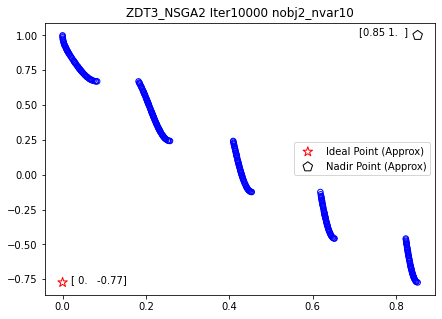

(300, 2)


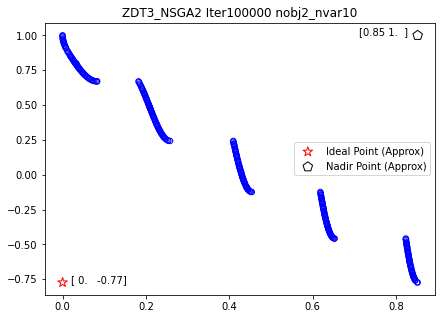

(300, 2)


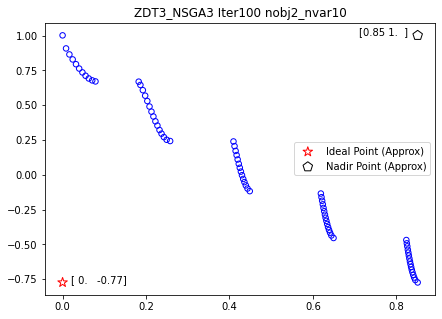

(71, 2)


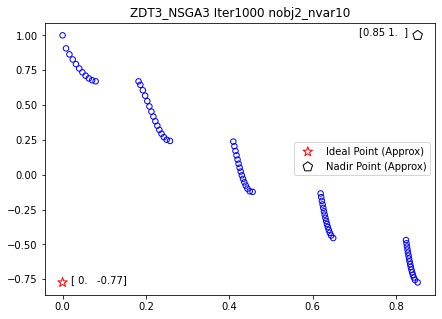

(72, 2)


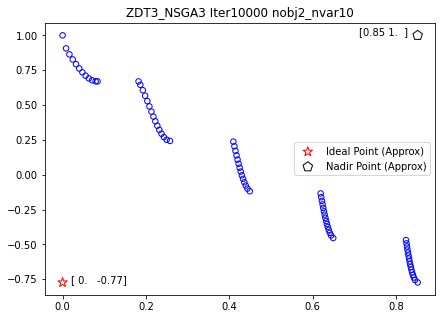

(72, 2)


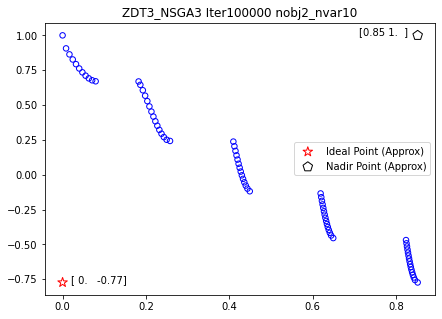

(71, 2)


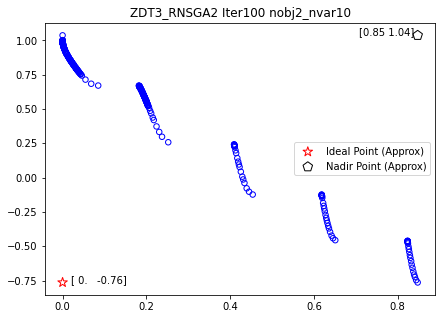

(300, 2)


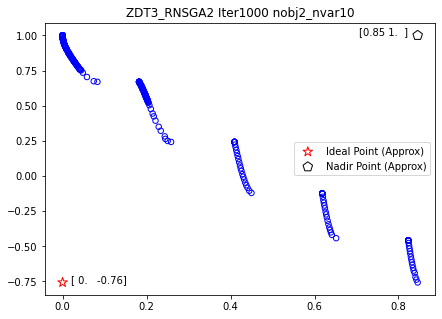

(300, 2)


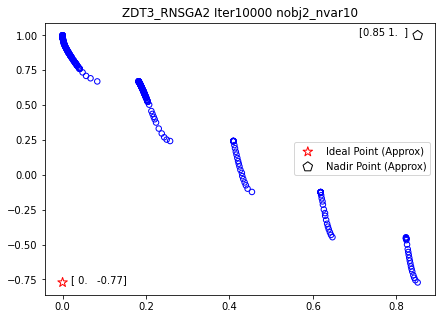

(300, 2)


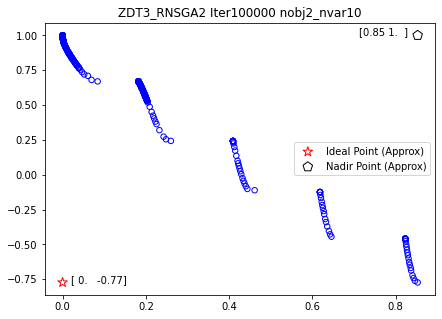

(300, 2)


In [82]:

for i in range(len(sorted_result)-10,len(sorted_result)):
    path = sorted_result['solution_path'][i]
    F = np.loadtxt(path)
    approx_ideal = F.min(axis=0)
    approx_nadir = F.max(axis=0)
    plt.figure(figsize=(7, 5))
    plt.text(approx_ideal[0]+0.02, approx_ideal[1], str(np.round(approx_ideal,2)))
    plt.text(approx_nadir[0]-0.14, approx_nadir[1], str(np.round(approx_nadir,2)))
    plt.scatter(F[:, 0], F[:, 1], s=30, facecolors='none', edgecolors='blue')
    plt.scatter(approx_ideal[0], approx_ideal[1], facecolors='none', edgecolors='red', marker="*", s=100, label="Ideal Point (Approx)")
    plt.scatter(approx_nadir[0], approx_nadir[1], facecolors='none', edgecolors='black', marker="p", s=100, label="Nadir Point (Approx)")
    plt.title(f"{sorted_result['Problem'][i]}_{sorted_result['Alg_name'][i]} Iter{sorted_result['Iteration'][i]} nobj{sorted_result['Objectives'][i]}_nvar{sorted_result['n_variables'][i]}")
    plt.legend()
    plt.show()

    print(F.shape)


In [9]:
import time 

ref_value = 3
def calculate_hv(result):
    path = result['path']
    F = np.loadtxt(path)
    ref_dir = np.ones(F.shape[1])*ref_value
    metric = Hypervolume(nds=True,ref_point = ref_dir,norm_ref_point=False)
    start_time = time.time()
    hv = metric.do(F)
    exc_time = time.time() - start_time
    return [hv,exc_time,ref_dir]

get = result.apply(calculate_hv, axis=1)

df = pd.DataFrame(get.tolist(), columns = ['hv','hv_exc_time','hv_ref'])

final_result = pd.concat([result, df],axis=1)

output_result = final_result[['Problem', 'Alg_name', 'Iteration', 'Objectives', 'n_variables',
    'exec_time', 'solutions', 'hv',
    'hv_exc_time', 'hv_ref', 
    'lower_bound', 'upper_bound','path']]

0     [/home/582/ow6835/MOOP/Result/VU1/NSGA2_VU1/VU...
1     [/home/582/ow6835/MOOP/Result/VU1/NSGA3_VU1/VU...
2     [/home/582/ow6835/MOOP/Result/VU1/RNSGA2_VU1/V...
3     [/home/582/ow6835/MOOP/Result/VU1/AGNOMEN_VU1/...
4     [/home/582/ow6835/MOOP/Result/VU1/MOEAD_VU1/VU...
                            ...                        
82    [/home/582/ow6835/MOOP/Result/ZDT2/RNSGA2_ZDT2...
83    [/home/582/ow6835/MOOP/Result/LTDZ1/MOEAD_LTDZ...
84    [/home/582/ow6835/MOOP/Result/TKLY1/NSGA2_TKLY...
85    [/home/582/ow6835/MOOP/Result/ZDT1/MOEAD_ZDT1/...
86    [/home/582/ow6835/MOOP/Result/ZDT1/MOEAD_ZDT1/...
Length: 87, dtype: object

In [12]:
arr_1 = np.loadtxt('/Users/wuyoscar/Downloads/VU1_NSGA3_Iteration-25000_Obj-2_Var-2.594ad572-96db-413a-9acb-2fd7caf4d524')

arr_1.shape

(100, 2)

In [15]:
np.ones(3)*10

array([10., 10., 10.])

In [16]:
from datetime import datetime

date = datetime.now().strftime("%Y_%m_%d-%I:%M:%S_%p")
print(f"filename_{date}")

filename_2021_10_27-01:55:29_PM


In [20]:
import numpy as np 
np.ones(4)

array([1., 1., 1., 1.])

In [34]:
 matplotlib 
np.random.random(100)*100

array([97.04706357, 85.45766889, 98.13714134, 20.90802183, 68.32235622,
       40.26369161, 52.52279093, 51.95965784,  8.04966645,  5.90483456,
       23.50685405, 10.33699146, 86.86601821, 99.85484405, 11.09429176,
       76.41826171,  2.33000715, 26.56924607,  8.67434216, 25.0237971 ,
        5.55192735, 10.62813719, 91.23499246, 46.51139221, 41.66218004,
        3.66678742, 92.98700311,  0.1132282 ,  3.01314977, 30.81439282,
       99.68599862, 22.74189282, 98.93400443, 26.29379038, 56.49470129,
       54.15359247, 38.55407599, 51.0496413 , 73.06048276, 74.70335799,
        1.01177219, 33.4451518 , 63.69871499, 82.2519232 , 61.50367317,
       99.20396248, 41.51225897, 96.94106968, 16.64233123, 53.73710322,
       78.29450376, 16.12411586, 25.75227931, 63.61546761, 69.12959541,
       71.00695526, 59.44252498, 56.77814161, 67.69853927, 40.55687599,
       42.94104404, 35.84017744, 71.55818468, 12.25553956, 45.01456645,
       95.50880464, 16.15741322, 24.02700124, 96.86760741, 35.18